<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

In [3]:
df = pd.read_excel(path)

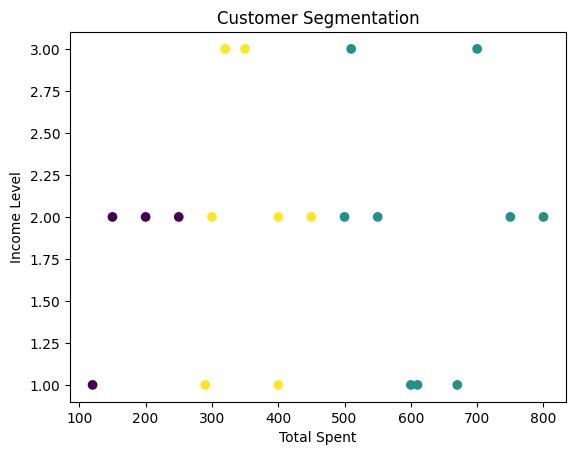

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = df[['Total Spent', 'Income Level']].copy()
features['Income Level'] = features['Income Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(features)

plt.scatter(features['Total Spent'], features['Income Level'], c=df['Segment'])
plt.title('Customer Segmentation')
plt.xlabel('Total Spent')
plt.ylabel('Income Level')
plt.show()

In [6]:
campaign_conversion = df.groupby('Campaign')['Converted'].mean()

print("Campaign Conversion Rates:")
print(campaign_conversion)

Campaign Conversion Rates:
Campaign
Black Friday    0.000000
Summer Sale     0.500000
Winter Sale     0.777778
Name: Converted, dtype: float64


In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['Sentiment Score'] = df['Comments'].apply(lambda x: sia.polarity_scores(str(x)))

campaign_sentiment = df.groupby('Campaign')['Sentiment Score'].mean()

print("Campaign Sentiment Distribution:")
print(campaign_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


TypeError: agg function failed [how->mean,dtype->object]

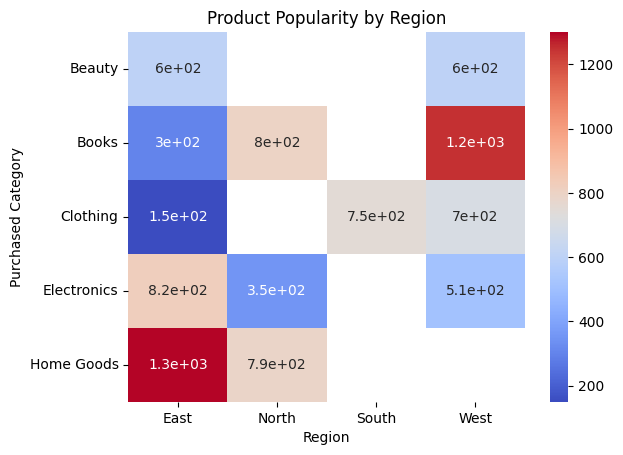

In [12]:
import seaborn as sns

popularity = df.pivot_table(index='Purchased Category', columns='Region', values='Total Spent', aggfunc='sum')

sns.heatmap(popularity, cmap='coolwarm', annot=True)
plt.title('Product Popularity by Region')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df[['Age', 'Total Spent', 'Discount Availed']]
y = df['Customer Tenure (Years)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(f"Predicted Tenure: {predictions[:5]}")

Predicted Tenure: [4.59 3.25 3.87 3.7  7.63]


In [16]:
df['ROI'] = df['Total Spent'] / (df['Discount Availed'] + 1)
roi_by_campaign = df.groupby('Campaign')['ROI'].mean()

print("ROI by Campaign")
print(roi_by_campaign)

ROI by Campaign
Campaign
Black Friday    24.126001
Summer Sale      7.197200
Winter Sale     34.027335
Name: ROI, dtype: float64


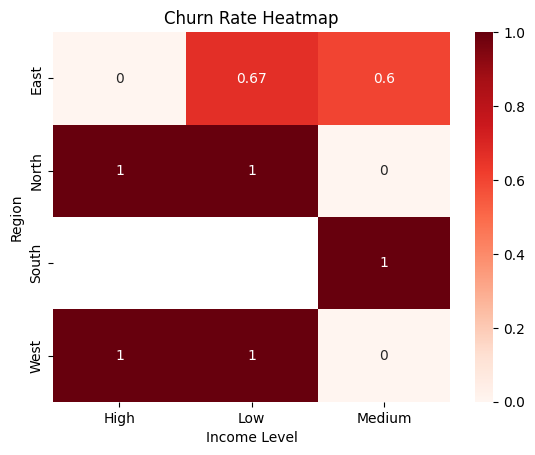

In [17]:
churn = df.pivot_table(index='Region', columns='Income Level', values='Converted', aggfunc='mean')

sns.heatmap(churn, cmap='Reds', annot=True)
plt.title('Churn Rate Heatmap')
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

X = df[['Discount Availed', 'Website Visit Frequency', 'Average Cart Value']]
y = df['Converted']

model = LogisticRegression()
model.fit(X, y)

predictions = model.predict(X)
print("Campaign Success Predictions:", predictions[:5])

Campaign Success Predictions: [1 1 0 0 1]


In [20]:
df['Lifetime Value'] = df['Total Spent'] * df['Customer Tenure (Years)']
lifetime_value_by_region = df.groupby('Region')['Lifetime Value'].mean()

print("Lifetime Value by Region:")
print(lifetime_value_by_region)

Lifetime Value by Region:
Region
East     2411.111111
North    5055.000000
South     750.000000
West     4011.666667
Name: Lifetime Value, dtype: float64


In [21]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.1, random_state=42)
df['Outlier'] = isolation_forest.fit_predict(df[['Total Spent']])

outliers = df[df['Outlier'] == -1]
print("Outliers in Spending:")
print(outliers)

Outliers in Spending:
   Customer ID  Age Gender  Total Spent  Converted          Comments  \
2            3   45      F          800          0  Regular customer   
7            8   27      M          120          1      New customer   

  Purchased Category  Stock Region Income Level  ...  Customer Tenure (Years)  \
2              Books     24  North       Medium  ...                       12   
7         Home Goods      0  North          Low  ...                        3   

       Campaign Return Rate (%)  Website Visit Frequency  Average Cart Value  \
2  Black Friday        6.547401                        0              250.69   
7   Winter Sale        5.268858                        7              181.40   

   Segment                                    Sentiment Score        ROI  \
2        1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  15.686275   
7        0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  17.142857   

   Lifetime Value  Outlier  
2            9600 